In [18]:
import folium
import pandas as pd

# 加载数据
df = pd.read_csv('dyadic with ratio.csv')

# 创建基础地图
m = folium.Map(location=[20, 0], zoom_start=2)

# 使用GeoJson来标记国家
country_geo = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'

def color_function(country):
    print(f"Processing: {country}")
    
    # 检查country是否在df的国家列表中
    if country in df['Country B'].tolist():
        row = df[df['Country B'] == country].iloc[0]
        if row['War or not'] == 1:
            print(f"{country} is red")
            return 'red'
        else:
            print(f"{country} is green")
            return 'green'
    else:
        print(f"{country} is not in df")
        return 'grey'

# 将国家添加到地图上
folium.GeoJson(
    country_geo,
    style_function=lambda feature: {
        'fillColor': color_function(feature['properties']['name']),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5'
    }
).add_to(m)

m.save('map.html')


Processing: Afghanistan
Afghanistan is not in df
Processing: Afghanistan
Afghanistan is not in df
Processing: Angola
Angola is not in df
Processing: Albania
Albania is not in df
Processing: United Arab Emirates
United Arab Emirates is not in df
Processing: Argentina
Argentina is not in df
Processing: Armenia
Armenia is not in df
Processing: Antarctica
Antarctica is not in df
Processing: French Southern and Antarctic Lands
French Southern and Antarctic Lands is not in df
Processing: Australia
Australia is not in df
Processing: Austria
Austria is not in df
Processing: Azerbaijan
Azerbaijan is not in df
Processing: Burundi
Burundi is not in df
Processing: Belgium
Belgium is not in df
Processing: Benin
Benin is not in df
Processing: Burkina Faso
Burkina Faso is not in df
Processing: Bangladesh
Bangladesh is not in df
Processing: Bulgaria
Bulgaria is not in df
Processing: The Bahamas
The Bahamas is not in df
Processing: Bosnia and Herzegovina
Bosnia and Herzegovina is not in df
Processing: 

In [3]:
! pip install folium


     |████████████████████████████████| 102 kB 3.5 MB/s ta 0:00:011


In [7]:
! pip install requests


In [8]:
import requests

# 下载GeoJSON文件
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'
geojson_data = requests.get(url).json()

# 打印每个国家的名称
for feature in geojson_data['features']:
    country_name = feature['properties']['name']
    print(country_name)

Afghanistan
Angola
Albania
United Arab Emirates
Argentina
Armenia
Antarctica
French Southern and Antarctic Lands
Australia
Austria
Azerbaijan
Burundi
Belgium
Benin
Burkina Faso
Bangladesh
Bulgaria
The Bahamas
Bosnia and Herzegovina
Belarus
Belize
Bolivia
Brazil
Brunei
Bhutan
Botswana
Central African Republic
Canada
Switzerland
Chile
China
Ivory Coast
Cameroon
Democratic Republic of the Congo
Republic of the Congo
Colombia
Costa Rica
Cuba
Northern Cyprus
Cyprus
Czech Republic
Germany
Djibouti
Denmark
Dominican Republic
Algeria
Ecuador
Egypt
Eritrea
Spain
Estonia
Ethiopia
Finland
Fiji
Falkland Islands
France
Gabon
United Kingdom
Georgia
Ghana
Guinea
Gambia
Guinea Bissau
Equatorial Guinea
Greece
Greenland
Guatemala
Guyana
Honduras
Croatia
Haiti
Hungary
Indonesia
India
Ireland
Iran
Iraq
Iceland
Israel
Italy
Jamaica
Jordan
Japan
Kazakhstan
Kenya
Kyrgyzstan
Cambodia
South Korea
Kosovo
Kuwait
Laos
Lebanon
Liberia
Libya
Sri Lanka
Lesotho
Lithuania
Luxembourg
Latvia
Morocco
Moldova
Madagascar
M

In [19]:
! pip install geopandas matplotlib


     |████████████████████████████████| 1.1 MB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 18.6 MB 192 kB/s eta 0:00:01
     |████████████████████████████████| 5.9 MB 23.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 27.5 MB/s eta 0:00:01


/var/folders/rd/d1ktv77x1t5d05wj0w7m1xzr0000gn/T/ipykernel_74792/641292965.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


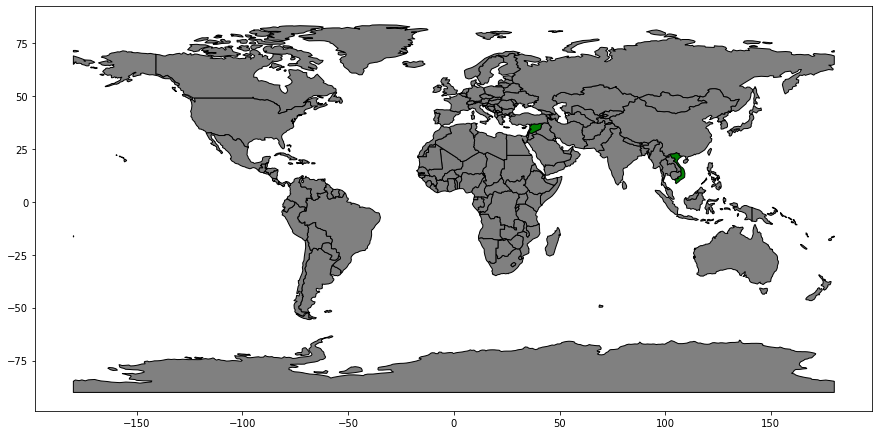

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# 加载数据
df = pd.read_csv('dyadic with ratio.csv')

# 读取GeoJSON文件
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 使'iso_a3'成为索引，这样我们可以直接使用它来匹配数据
world.set_index('iso_a3', inplace=True)

# 用于存储每个国家的颜色
colors = {}

# 填充颜色
for country_code in world.index:
    country_name = world.loc[country_code, 'name']
    if country_name in df['Country A'].values:
        if df[df['Country A'] == country_name]['War or not'].iloc[0] == 1:
            colors[country_code] = 'red'
        else:
            colors[country_code] = 'green'
    else:
        colors[country_code] = 'grey'

# 绘制地图
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# 使用 colors 字典为每个国家指定颜色
world['color'] = world.index.map(colors)

# 使用颜色映射来填充国家几何形状
world.plot(ax=ax, color=world['color'], edgecolor='black')

plt.show()


In [22]:
# 查找存在于 df 但不在 world 中的国家
missing_in_world = df[~df['Country A'].isin(world['name'])]['Country A'].unique()

# 查找存在于 world 但不在 df 中的国家
missing_in_df = world[~world['name'].isin(df['Country A'])]['name'].unique()

print("Countries in df but not in world dataset:", missing_in_world)
print("Countries in world dataset but not in df:", missing_in_df)


Countries in df but not in world dataset: ['Afghanistan ' 'Algeria ' 'Argentina ' 'Australia ' 'Austria ' 'Belgium '
 'Benin ' 'Bolivia ' 'Brazil ' 'Burkina Faso ' 'Burundi ' 'Cameroon '
 'Canada ' 'Chile ' 'Colombia ' 'Congo '
 'Democratic Republic of the Congo ' 'Denmark ' 'Dominican Republic '
 'Ecuador ' 'Egypt ' 'El Salvador ' 'Ethiopia ' 'Fiji ' 'Finland '
 'France ' 'Gabon ' 'Germany ' 'Ghana ' 'Greece ' 'Guatemala ' 'Honduras '
 'Hungary ' 'India ' 'Iran ' 'Iraq ' 'Ireland ' 'Israel ' 'Italy '
 'Ivory Coast ' 'Japan ' 'Jordan ' 'Kenya ' 'Kuwait ' 'Lebanon '
 'Liberia ' 'Libya ' 'Luxembourg ' 'Madagascar ' 'Malawi ' 'Malaysia '
 'Mali ' 'Mauritius ' 'Mexico ' 'Morocco ' 'Myanmar ' 'Nepal '
 'Netherlands ' 'New Zealand ' 'Nicaragua ' 'Nigeria ' 'Norway '
 'Pakistan ' 'Paraguay ' 'Peru ' 'Philippines ' 'Portugal '
 'Saudi Arabia ' 'Sierra Leone ' 'Singapore ' 'Somalia ' 'South Africa '
 'South Korea ' 'Spain ' 'Sri Lanka ' 'Sudan ' 'Sweden ' 'Switzerland '
 'Tanzania ' 'Thailand '

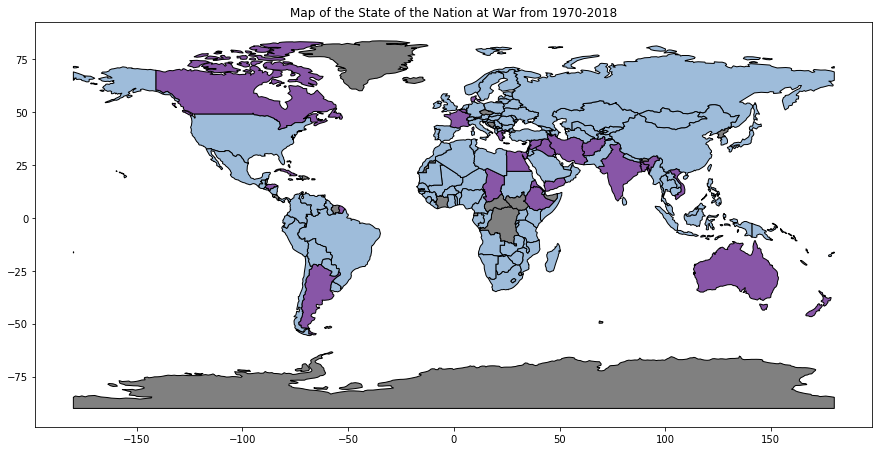

In [27]:
# 1. 去掉 df 中的国家名称末尾的空格
df['Country A'] = df['Country A'].str.strip()

# 2. 重新进行颜色填充
colors = {}

for country_code in world.index:
    country_name = world.loc[country_code, 'name']
    if country_name in df['Country A'].values:
        for country_code in world.index:
            country_name = world.loc[country_code, 'name']
            country_df = df[df['Country A'] == country_name]
            if country_name in df['Country A'].values:
                if any(country_df['War or not'] == 1):
                    colors[country_code] = '#8856a7'
                else:
                    colors[country_code] = '#9ebcda'
            else:
                colors[country_code] = 'grey'

        else:
            colors[country_code] = 'green'
    else:
        colors[country_code] = 'grey'

# 3. 重新绘制地图
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world['color'] = world.index.map(colors)
world.plot(ax=ax, color=world['color'], edgecolor='black')
ax.set_title("Map of the State of the Nation at War from 1970-2018")
plt.show()


In [26]:
war_countries_df = df[df['War or not'] == 1]
war_colors = {country: colors[world[world['name'] == country].index[0]] for country in war_countries_df['Country A'] if country in world['name'].values}

# 输出与“War or not”为1的国家相关的颜色
war_colors

{'India': 'red',
 'Egypt': 'red',
 'Ethiopia': 'red',
 'Iran': 'red',
 'Chad': 'red',
 'Iraq': 'red',
 'Argentina': 'red',
 'Australia': 'red',
 'Bangladesh': 'red',
 'Belgium': 'red',
 'Canada': 'red',
 'Denmark': 'red',
 'France': 'red',
 'Greece': 'red',
 'Honduras': 'red',
 'Eritrea': 'red',
 'Afghanistan': 'red',
 'Syria': 'red',
 'New Zealand': 'red',
 'Cyprus': 'red',
 'Cuba': 'red',
 'Yemen': 'red',
 'Vietnam': 'red'}

In [28]:
from graphviz import Digraph

dot = Digraph()

# 创建节点
dot.node('A', 'UCDP/PRIO Armed Conflict Dataset v23.1')
dot.node('B', 'V-Dem Full+Others v13')
dot.node('C', 'SIPRI Military Expenditure Database')
dot.node('D', 'Polity 5')
dot.node('E', 'GeoDataSource')
dot.node('F', '整合并添加Alpha-3 code')
dot.node('G', '转化为dyadic Form')
dot.node('H', '计算ratio值')
dot.node('I', '最终数据集')

# 创建边
dot.edges(['AF', 'BF', 'CF', 'DF', 'EF', 'FG', 'GH', 'HI'])

dot.render('data_process.gv', view=True)  # 输出PDF

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH